# Import i merge danych

## Ściągnięcie danych

In [ ]:
from google.colab import files
files.upload() # wybrać json z credentialami kaggla

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wiktorosior","key":"d5a5b91f3deae587686ce97bed99cf9d"}'}

In [ ]:
# Tworzenie folderu kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Pobieranie bazy danych
!kaggle datasets download -d goyaladi/fraud-detection-dataset

!unzip fraud-detection-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/goyaladi/fraud-detection-dataset
License(s): CC0-1.0
  0% 0.00/82.9k [00:00<?, ?B/s]
100% 82.9k/82.9k [00:00<00:00, 269MB/s]
Archive:  fraud-detection-dataset.zip
  inflating: Data/Customer Profiles/account_activity.csv  
  inflating: Data/Customer Profiles/customer_data.csv  
  inflating: Data/Fraudulent Patterns/fraud_indicators.csv  
  inflating: Data/Fraudulent Patterns/suspicious_activity.csv  
  inflating: Data/Merchant Information/merchant_data.csv  
  inflating: Data/Merchant Information/transaction_category_labels.csv  
  inflating: Data/Transaction Amounts/amount_data.csv  
  inflating: Data/Transaction Amounts/anomaly_scores.csv  
  inflating: Data/Transaction Data/transaction_metadata.csv  
  inflating: Data/Transaction Data/transaction_records.csv  
  inflating: Readme.md               
  inflating: Src/data.py             


## Załadowanie danych do DataFramów

In [ ]:
import pandas as pd

csv_files = [
    '/content/Data/Customer Profiles/customer_data.csv',
    '/content/Data/Customer Profiles/account_activity.csv',
    '/content/Data/Fraudulent Patterns/fraud_indicators.csv',
    '/content/Data/Fraudulent Patterns/suspicious_activity.csv',
    '/content/Data/Merchant Information/merchant_data.csv',
    '/content/Data/Merchant Information/transaction_category_labels.csv',
    '/content/Data/Transaction Amounts/amount_data.csv',
    '/content/Data/Transaction Amounts/anomaly_scores.csv',
    '/content/Data/Transaction Data/transaction_metadata.csv'
]

# import danych do DataFramów
for file_path in csv_files:
    df_name = 'df_' + file_path.split('/')[-1].replace('.csv', '')
    globals()[df_name] = pd.read_csv(file_path)
    # print(f"\nDataFrame: {df_name}")
    # display(globals()[df_name].head())

## Zmergowanie danych

In [ ]:
import pandas as pd

# Załadowanie tabeli z transakcjami (centralnej)
df_transactions = pd.read_csv('/content/Data/Transaction Data/transaction_records.csv')

# Zmergowanie wszystkiego leftem
df_transactions = df_transactions.merge(df_fraud_indicators, on='TransactionID', how='left')
df_transactions = df_transactions.merge(df_transaction_category_labels, on='TransactionID', how='left')
df_transactions = df_transactions.merge(df_amount_data, on='TransactionID', how='left')
df_transactions = df_transactions.merge(df_anomaly_scores, on='TransactionID', how='left')
df_transactions = df_transactions.merge(df_transaction_metadata, on='TransactionID', how='left')
df_transactions = df_transactions.merge(df_merchant_data, on='MerchantID', how='left')
df_transactions = df_transactions.merge(df_customer_data, on='CustomerID', how='left')
df_transactions = df_transactions.merge(df_account_activity, on='CustomerID', how='left')
df_transactions = df_transactions.merge(df_suspicious_activity, on='CustomerID', how='left')

display(df_transactions.head())

,TransactionID,Amount,CustomerID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,MerchantName,Location,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1,55.530334,1952,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,Merchant 2701,Location 2701,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
1,2,12.881180,1027,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,Merchant 2070,Location 2070,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0
2,3,50.176322,1955,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,Merchant 2238,Location 2238,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
3,4,41.634001,1796,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,Merchant 2879,Location 2879,Customer 1796,33,Address 1796,5588.049942,2024-03-06,0
4,5,78.122853,1946,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,Merchant 2966,Location 2966,Customer 1946,18,Address 1946,7324.785332,2024-08-03,0


# Analiza zbioru

In [168]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [169]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TransactionID           1000 non-null   int64         
 1   Amount                  1000 non-null   float64       
 2   CustomerID              1000 non-null   int64         
 3   FraudIndicator          1000 non-null   int64         
 4   Category                1000 non-null   object        
 5   TransactionAmount       1000 non-null   float64       
 6   AnomalyScore            1000 non-null   float64       
 7   Timestamp               1000 non-null   datetime64[ns]
 8   MerchantID              1000 non-null   int64         
 9   MerchantName            1000 non-null   object        
 10  Location                1000 non-null   object        
 11  Name                    1000 non-null   object        
 12  Age                     1000 non-null   int64    

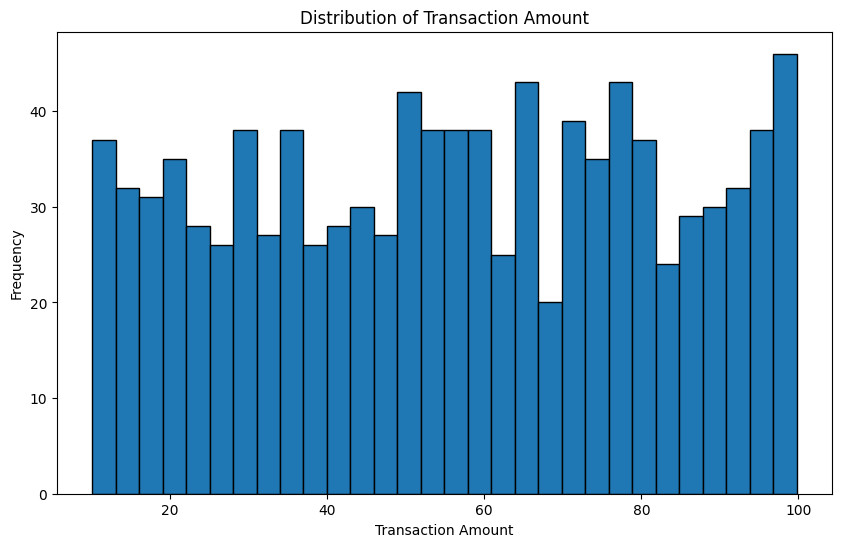

In [170]:
plt.figure(figsize=(10, 6))
plt.hist(df_transactions['TransactionAmount'], bins=30, edgecolor='k')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [171]:
print(df_transactions['Category'].unique())

['Other' 'Online' 'Travel' 'Food' 'Retail']


In [172]:
print(f"Number of unique Merchant IDs: {df_transactions['MerchantID'].nunique()}")

Number of unique Merchant IDs: 651


In [173]:
unique_locations = df_transactions['Location'].nunique()
print(f"Number of unique Locations: {unique_locations}")

Number of unique Locations: 651


In [174]:
unique_locations = df_transactions[['Location', 'MerchantID']].nunique()
print(f"Number of unique Locations: {unique_locations}")

Number of unique Locations: Location      651
MerchantID    651
dtype: int64


todo: usunąć/przenieść
nwm, czy coś tu da się zrobić

trochę dużo tych merchantów i ich lokalizacji

ale przynajmniej wiadomo, że todo: można przynajmniej jedną z tych kolumn wywalić

bo przechowują tą samą informację

nalazłem, że w tej sytuacji mogą pomóc "embeddingi"

np. Karpathy używał w swoim tutorialu 2-wymiarowych embeddingów do reprezentacji liter
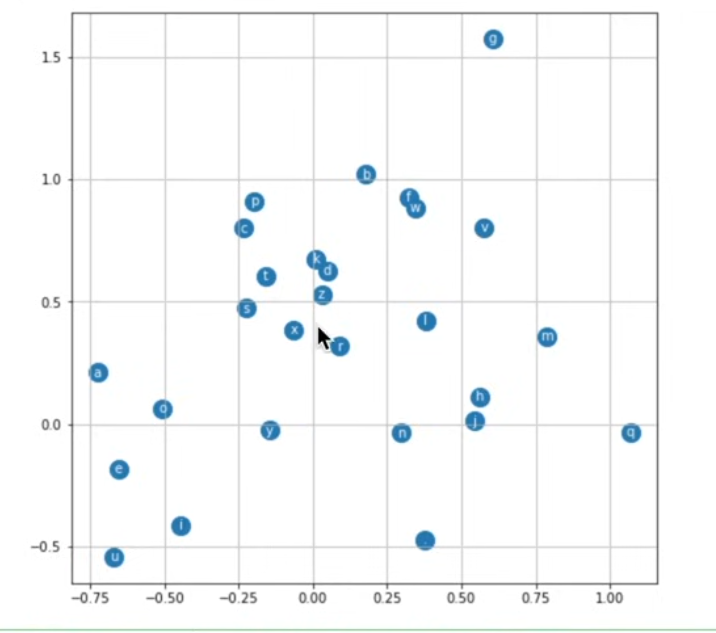

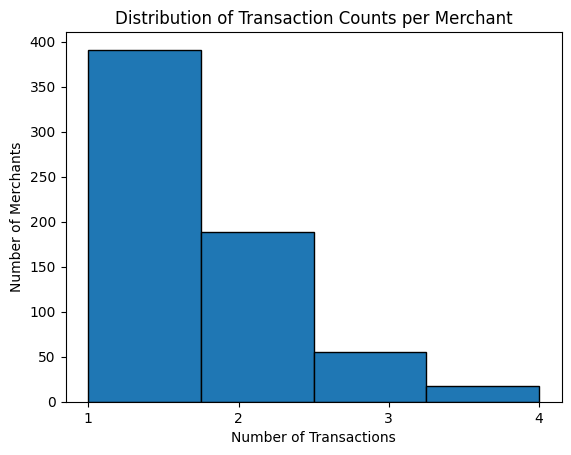

In [175]:
merchant_transaction_counts = df_transactions['MerchantID'].value_counts()

plt.hist(merchant_transaction_counts, bins=4, edgecolor='k')
plt.title('Distribution of Transaction Counts per Merchant')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Merchants')

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show('merchant_transaction_distribution.png')

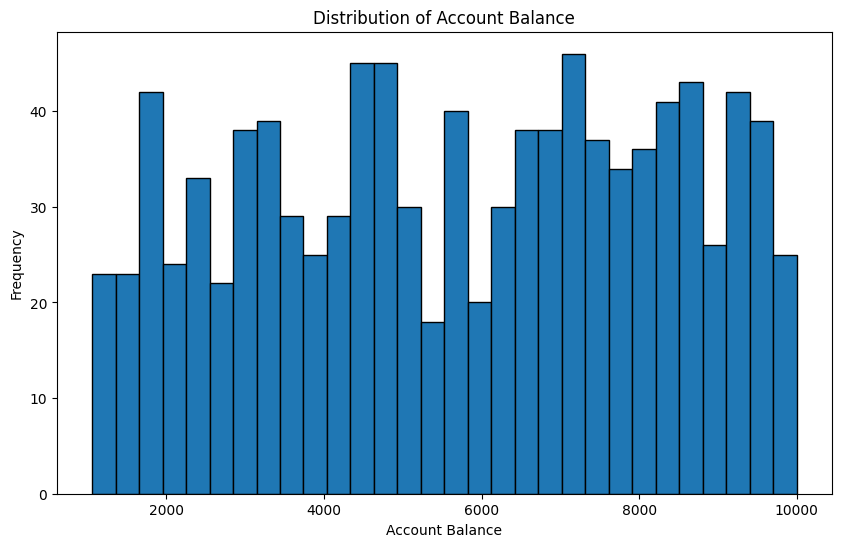

In [176]:
plt.figure(figsize=(10, 6))
plt.hist(df_transactions['AccountBalance'], bins=30, edgecolor='k')
plt.title('Distribution of Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

In [177]:
# df_transactions['Timestamp'] = pd.to_datetime(df_transactions['Timestamp'])

# plt.figure(figsize=(12, 6))
# plt.hist(df_transactions['Timestamp'], bins=100, edgecolor='k')
# plt.title('Number of Transactions Over Time')
# plt.xlabel('Timestamp')
# plt.ylabel('Number of Transactions')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

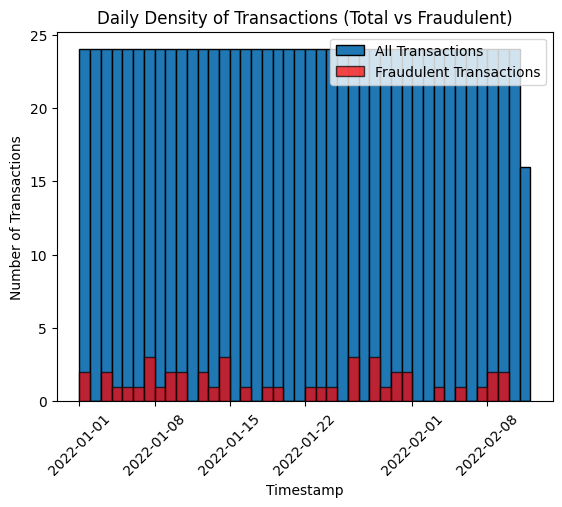

In [178]:
df_transactions['Timestamp'] = pd.to_datetime(df_transactions['Timestamp'])

start_date = df_transactions['Timestamp'].min().normalize()
end_date = df_transactions['Timestamp'].max().normalize() + pd.Timedelta(days=1)
daily_bins = pd.date_range(start=start_date, end=end_date, freq='D')

plt.hist(df_transactions['Timestamp'], bins=daily_bins, edgecolor='k', label='All Transactions')

df_fraudulent = df_transactions[df_transactions['FraudIndicator'] == 1]

plt.hist(df_fraudulent['Timestamp'], bins=daily_bins, edgecolor='k', color='red', alpha=0.7, label='Fraudulent Transactions')

plt.title('Daily Density of Transactions (Total vs Fraudulent)')
plt.xlabel('Timestamp')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend()
plt.show()

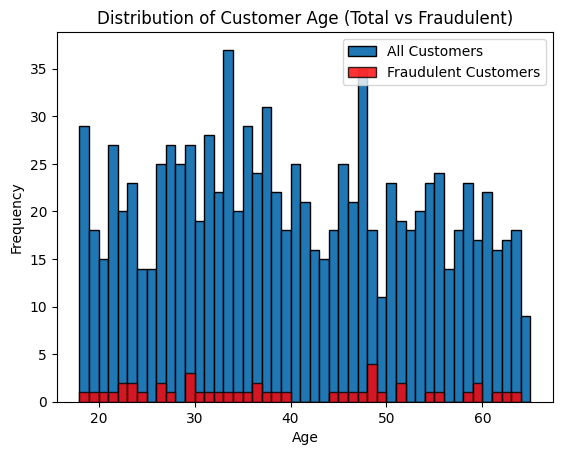

In [179]:
import numpy as np
min_age = int(df_transactions['Age'].min())
max_age = int(df_transactions['Age'].max())
daily_bins = np.arange(min_age, max_age + 2)

plt.hist(df_transactions['Age'], bins=daily_bins, edgecolor='k', label='All Customers')

df_fraudulent = df_transactions[df_transactions['FraudIndicator'] == 1]

plt.hist(df_fraudulent['Age'], bins=daily_bins, edgecolor='k', color='red', alpha=0.8, label='Fraudulent Customers')

plt.title('Distribution of Customer Age (Total vs Fraudulent)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

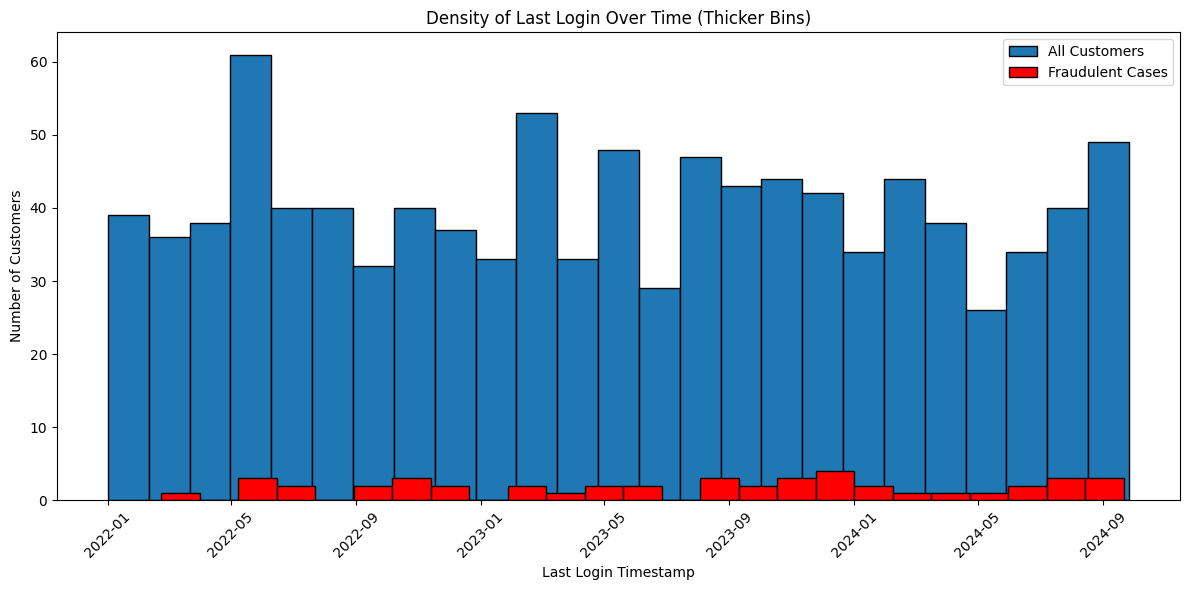

In [180]:
# df_transactions['LastLogin'] = pd.to_datetime(df_transactions['LastLogin'])

plt.figure(figsize=(12, 6))

num_bins = 25

plt.hist(df_transactions['LastLogin'], bins=num_bins, edgecolor='k', label='All Customers')

df_fraudulent = df_transactions[df_transactions['FraudIndicator'] == 1]
plt.hist(df_fraudulent['LastLogin'], bins=num_bins, edgecolor='k',
         color='red', label='Fraudulent Cases')

plt.title('Density of Last Login Over Time (Thicker Bins)')
plt.xlabel('Last Login Timestamp')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

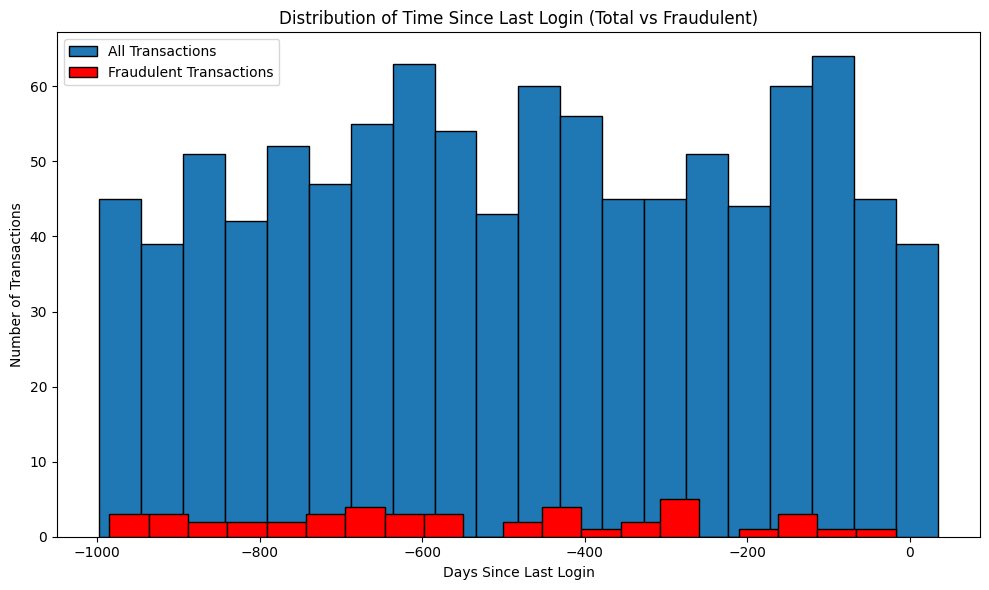

In [181]:
df_transactions['LastLogin'] = pd.to_datetime(df_transactions['LastLogin'])
df_transactions['Timestamp'] = pd.to_datetime(df_transactions['Timestamp'])

df_transactions['TimeSinceLastLoginDays'] = (df_transactions['Timestamp'] - df_transactions['LastLogin']).dt.days

plt.figure(figsize=(10, 6))

num_bins = 20

plt.hist(df_transactions['TimeSinceLastLoginDays'], bins=num_bins, edgecolor='k', label='All Transactions')

df_fraudulent = df_transactions[df_transactions['FraudIndicator'] == 1]
plt.hist(df_fraudulent['TimeSinceLastLoginDays'], bins=num_bins, edgecolor='k', color='red', label='Fraudulent Transactions')

plt.title('Distribution of Time Since Last Login (Total vs Fraudulent)')
plt.xlabel('Days Since Last Login')
plt.ylabel('Number of Transactions')
plt.legend()
plt.tight_layout()
plt.show()

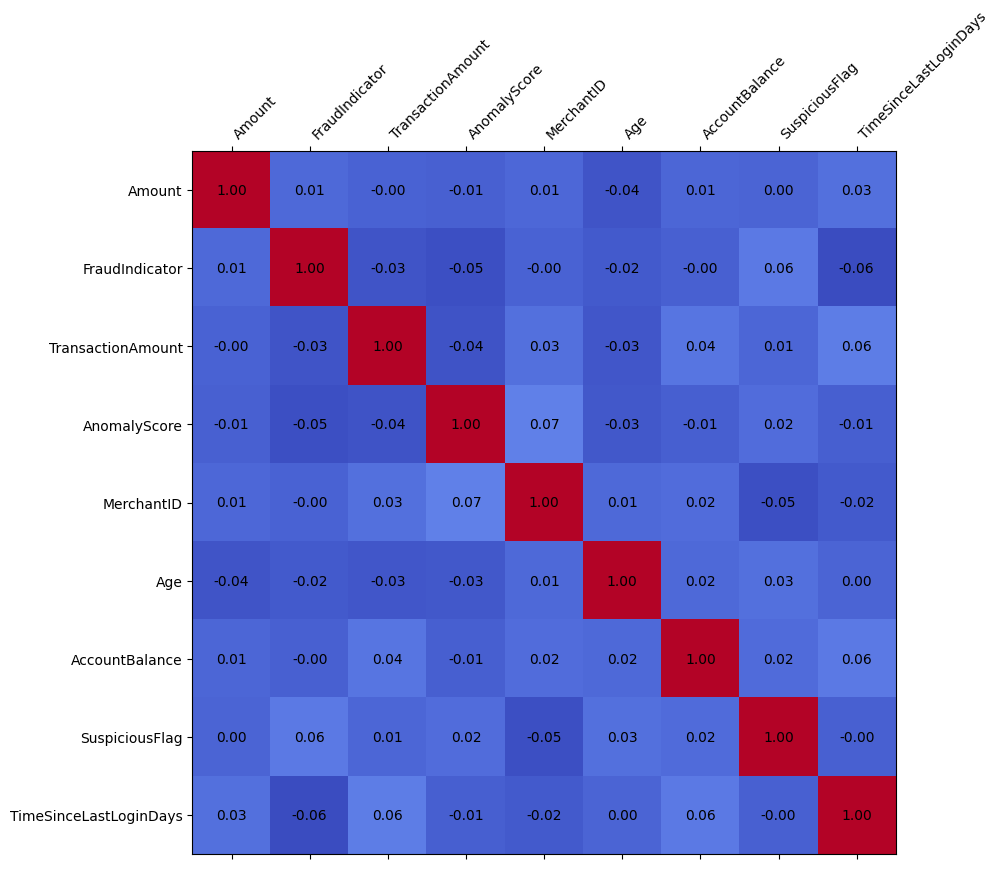

In [182]:
df_numeric = df_transactions.select_dtypes(include=['number'])

cols_to_drop = ['TransactionID', 'CustomerID']
df_filtered = df_numeric.drop(columns=[c for c in cols_to_drop if c in df_numeric.columns])

corr = df_filtered.corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr, cmap='coolwarm')

ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha='left')
ax.set_yticklabels(corr.columns)

for (i, j), val in np.ndenumerate(corr):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()

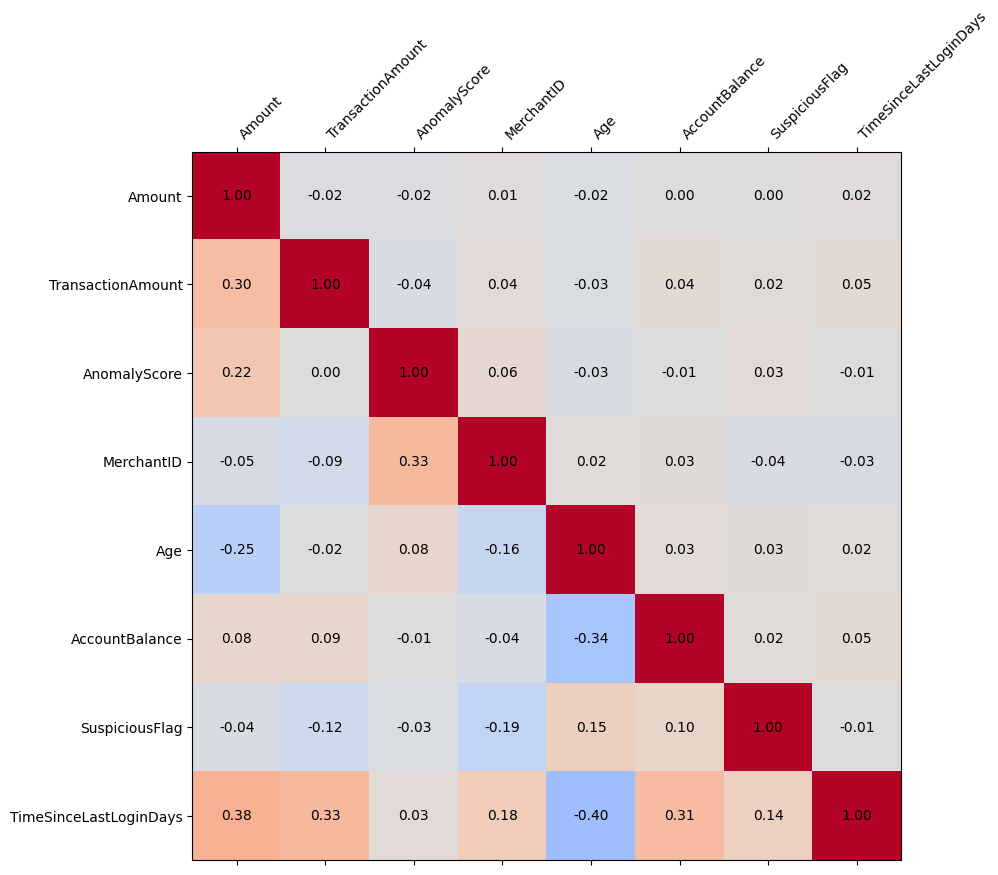

In [183]:
df_numeric = df_transactions.select_dtypes(include=['number'])
cols_to_drop = ['TransactionID', 'CustomerID', 'FraudIndicator']
df_numeric = df_numeric.drop(columns=[c for c in cols_to_drop if c in df_numeric.columns])

corr_f = df_numeric[df_transactions['FraudIndicator'] == 1].corr()
corr_nf = df_numeric[df_transactions['FraudIndicator'] == 0].corr()

combined = corr_nf.copy()
for i in range(len(combined)):
    for j in range(i):
        combined.iloc[i, j] = corr_f.iloc[i, j]

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(combined, cmap='coolwarm', vmin=-1, vmax=1)

ax.set_xticks(range(len(combined.columns)))
ax.set_yticks(range(len(combined.columns)))
ax.set_xticklabels(combined.columns, rotation=45, ha='left')
ax.set_yticklabels(combined.columns)

for (i, j), val in np.ndenumerate(combined):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center')

# plt.title('Correlation: Non-Fraud (Upper Triangle) vs Fraud (Lower Triangle)', pad=30)
plt.tight_layout()
plt.show()

# Obróbka danych

## Kopiowanie danych

In [230]:
df = df_transactions.copy()
# df.head()

## Zamiana formatów innych niz liczbowe

In [231]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Timestamp'] = pd.to_datetime(df['Timestamp']) # dodałem te 2 linijki, żeby działało poprawnie
df['LastLogin'] = pd.to_datetime(df['LastLogin'])


df['TimeSinceLastLoginDays'] = (df['LastLogin'] - df['Timestamp']).dt.days


# Zmiana formatu i dodanie nowych kolumn
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.weekday
df['WorkingHoursFlag'] = df['Hour'].apply(lambda x: 1 if 9 <= x <= 17 else 0)
df['WeekendsFlag'] = df['Day'].apply(lambda x: 1 if x >= 5 else 0)

## Hot encoding dla Category

In [232]:
import pandas as pd

# Lista kolumn do encodingu
categorical_cols = ['Category']

cols_to_encode = [c for c in categorical_cols if c in df.columns]

# One hot encoding
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

# Wyniki
print("Nowe kolumny po encodingu:")
print(df.columns)


Nowe kolumny po encodingu:
Index(['TransactionID', 'Amount', 'CustomerID', 'FraudIndicator',
       'TransactionAmount', 'AnomalyScore', 'Timestamp', 'MerchantID',
       'MerchantName', 'Location', 'Name', 'Age', 'Address', 'AccountBalance',
       'LastLogin', 'SuspiciousFlag', 'TimeSinceLastLoginDays', 'Hour', 'Day',
       'WorkingHoursFlag', 'WeekendsFlag', 'Category_1', 'Category_2',
       'Category_3', 'Category_4'],
      dtype='object')


In [233]:
bool_cols = ['Category_1', 'Category_2',
       'Category_3', 'Category_4']

df[bool_cols] = df[bool_cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TransactionID           1000 non-null   int64         
 1   Amount                  1000 non-null   float64       
 2   CustomerID              1000 non-null   int64         
 3   FraudIndicator          1000 non-null   int64         
 4   TransactionAmount       1000 non-null   float64       
 5   AnomalyScore            1000 non-null   float64       
 6   Timestamp               1000 non-null   datetime64[ns]
 7   MerchantID              1000 non-null   int64         
 8   MerchantName            1000 non-null   object        
 9   Location                1000 non-null   object        
 10  Name                    1000 non-null   object        
 11  Age                     1000 non-null   int64         
 12  Address                 1000 non-null   object   

## Wykres KDE

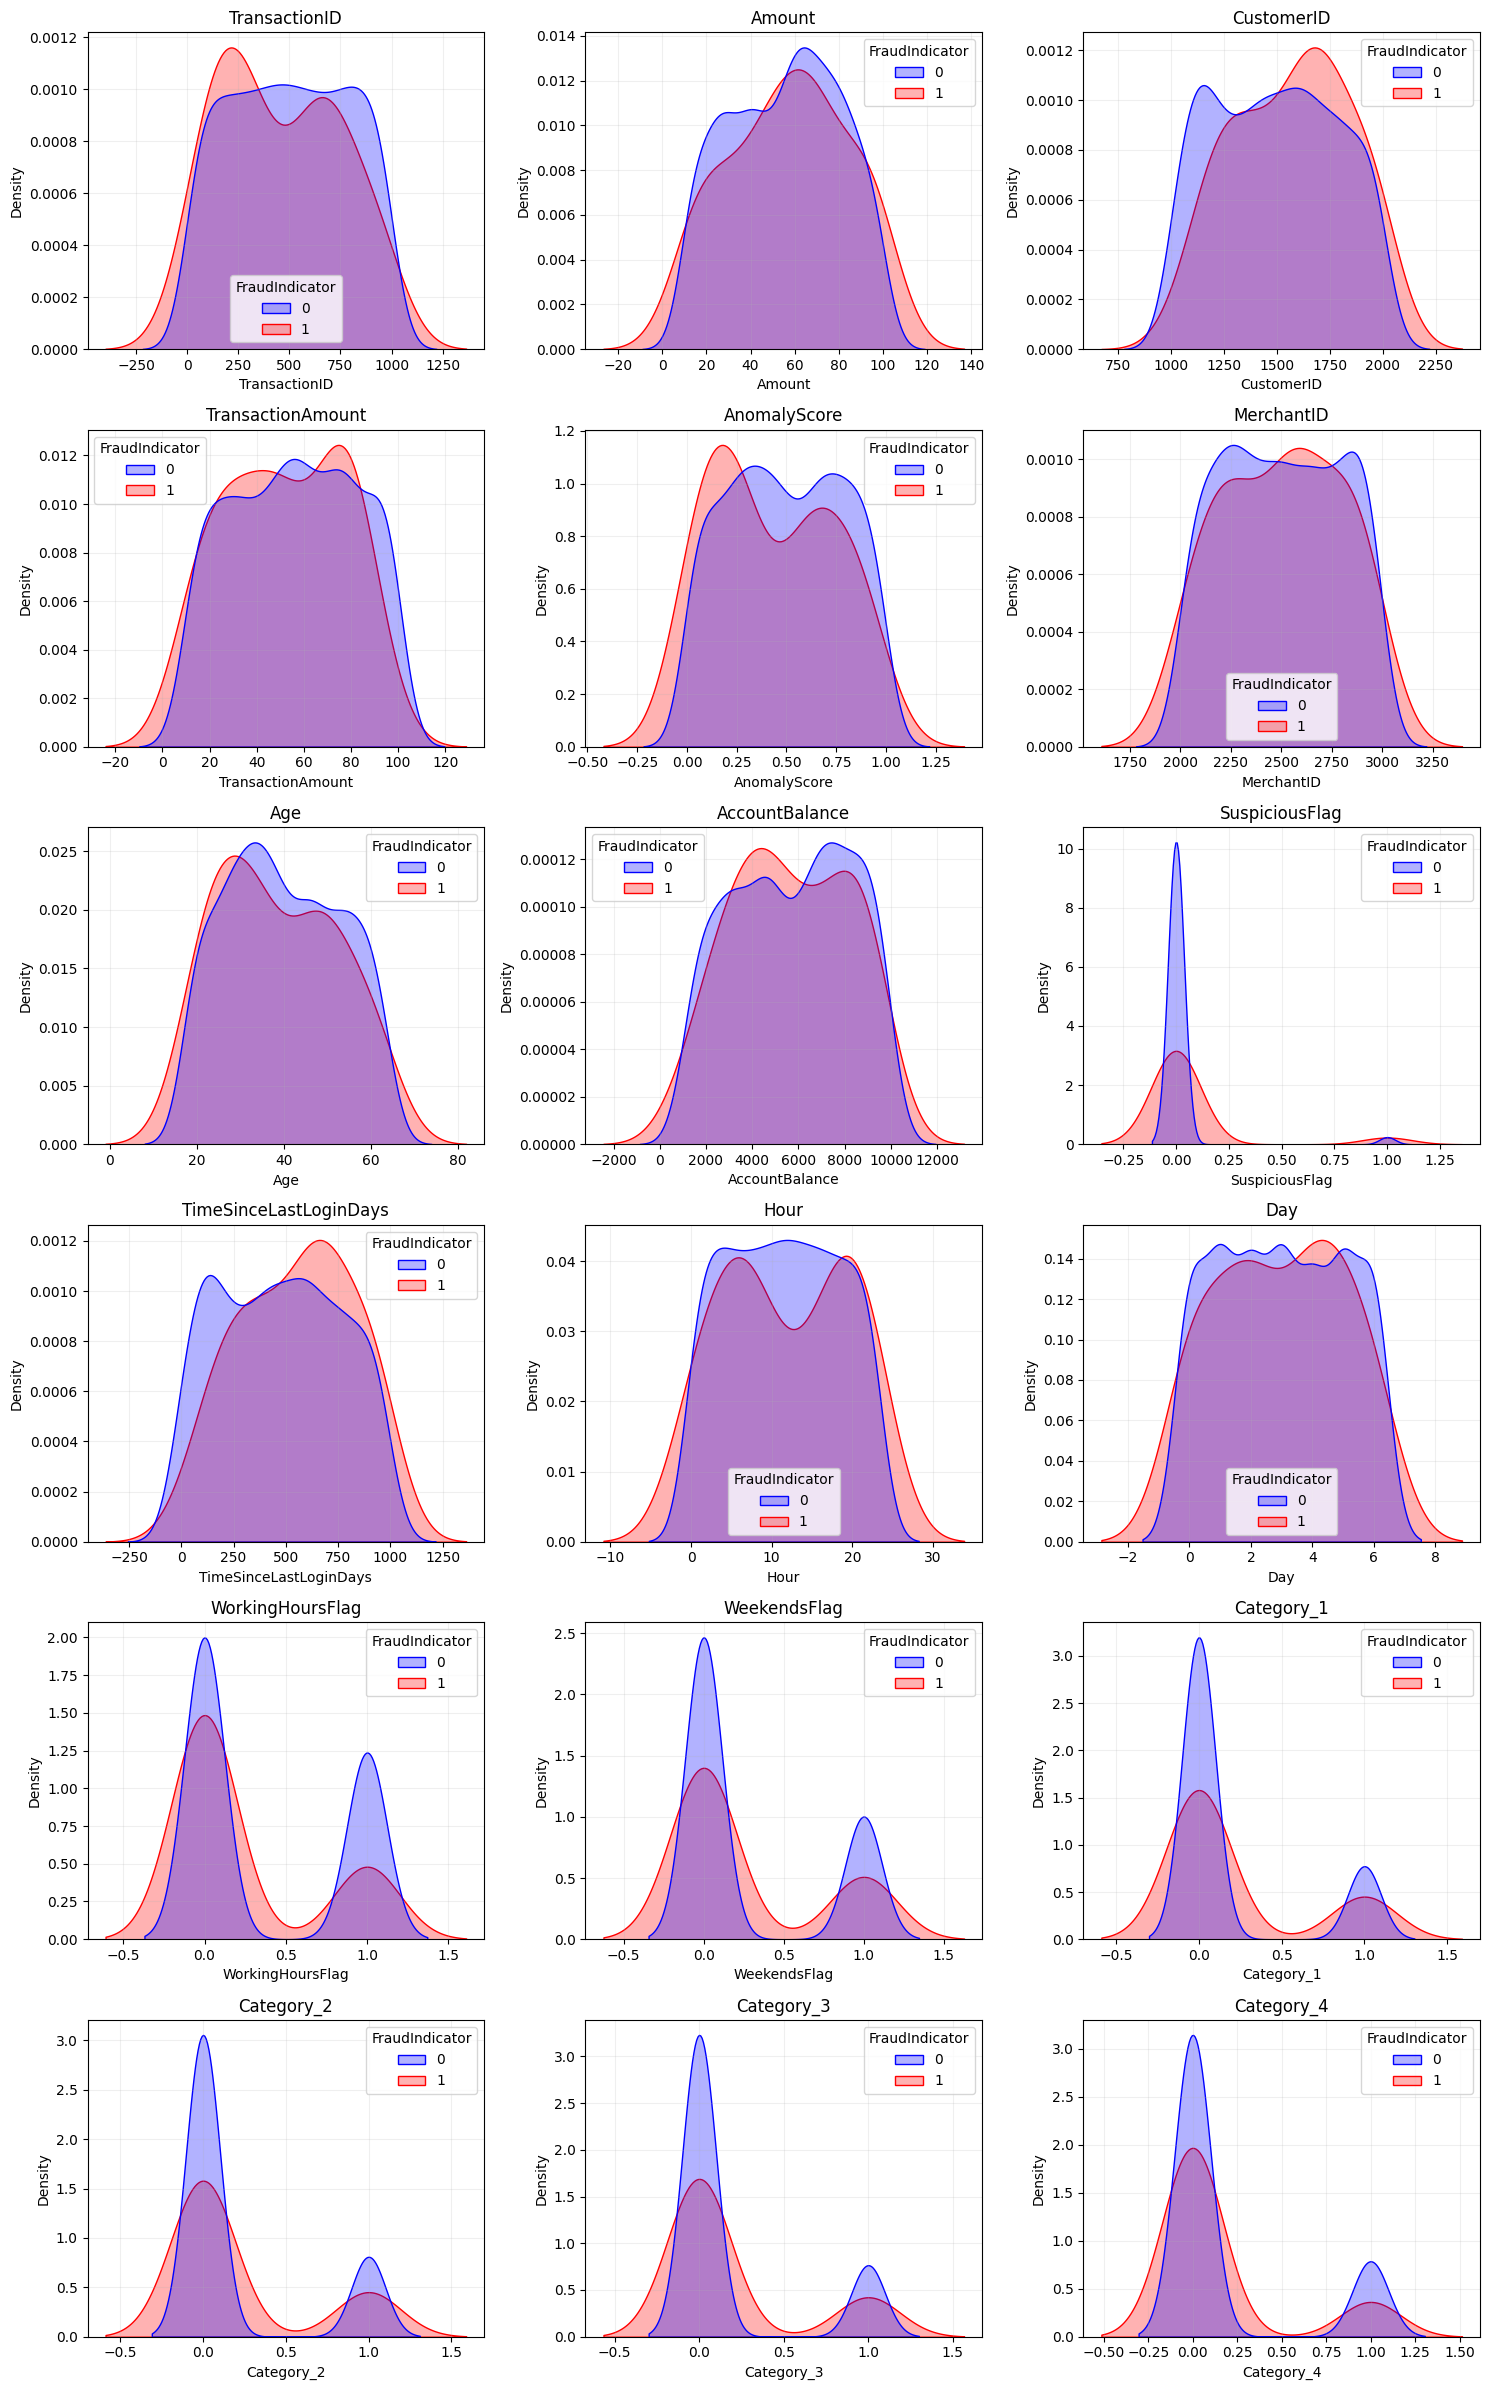

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Wybieramy tylko numeryczne kolumny
cols_numeric = df.select_dtypes(include=[np.number]).columns.tolist()
# Usuwamy FraudIndicator z listy cech do rysowania
cols_to_plot = [c for c in cols_numeric if c != 'FraudIndicator']

# Ustawienia siatki
n_cols = 3
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(cols_to_plot):
    plt.subplot(n_rows, n_cols, i+1)

    # Rysujemy KDE (Kernel Density Estimate)
    # common_norm=False - skalowanie wykresów
    sns.kdeplot(data=df, x=col, hue='FraudIndicator',
                common_norm=False, fill=True, palette={0:'blue', 1:'red'}, alpha=0.3)

    plt.title(f'{col}')
    plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

## Drop niepotrzebnych kolumn

In [235]:
# columns_to_be_dropped = ['TransactionID','MerchantID','MerchantName', 'Age', 'Location','Address','Name'] # czy to nie za dużo?
columns_to_be_dropped = ['TransactionID','MerchantName', 'Location','Address','Name']
df = df.drop(columns=columns_to_be_dropped)

In [236]:
df.head()

,Amount,CustomerID,FraudIndicator,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Age,AccountBalance,LastLogin,SuspiciousFlag,TimeSinceLastLoginDays,Hour,Day,WorkingHoursFlag,WeekendsFlag,Category_1,Category_2,Category_3,Category_4
0,55.530334,1952,0,79.413607,0.686699,2022-01-01 00:00:00,2701,50,2869.689912,2024-08-09,0,951,0,5,0,1,0,1,0,0
1,12.881180,1027,0,12.053087,0.081749,2022-01-01 01:00:00,2070,46,9527.947107,2022-01-27,0,25,1,5,0,1,1,0,0,0
2,50.176322,1955,0,33.310357,0.023857,2022-01-01 02:00:00,2238,34,9288.355525,2024-08-12,0,953,2,5,0,1,0,0,0,1
3,41.634001,1796,0,46.121117,0.876994,2022-01-01 03:00:00,2879,33,5588.049942,2024-03-06,0,794,3,5,0,1,0,0,0,1
4,78.122853,1946,0,54.051618,0.034059,2022-01-01 04:00:00,2966,18,7324.785332,2024-08-03,0,944,4,5,0,1,0,1,0,0


# Test Random Forest

## Stworzenie X Y

In [237]:
X = df.drop(['FraudIndicator','Timestamp','LastLogin','CustomerID'],axis=1)
Y = df['FraudIndicator']
X.head()

,Amount,TransactionAmount,AnomalyScore,MerchantID,Age,AccountBalance,SuspiciousFlag,TimeSinceLastLoginDays,Hour,Day,WorkingHoursFlag,WeekendsFlag,Category_1,Category_2,Category_3,Category_4
0,55.530334,79.413607,0.686699,2701,50,2869.689912,0,951,0,5,0,1,0,1,0,0
1,12.881180,12.053087,0.081749,2070,46,9527.947107,0,25,1,5,0,1,1,0,0,0
2,50.176322,33.310357,0.023857,2238,34,9288.355525,0,953,2,5,0,1,0,0,0,1
3,41.634001,46.121117,0.876994,2879,33,5588.049942,0,794,3,5,0,1,0,0,0,1
4,78.122853,54.051618,0.034059,2966,18,7324.785332,0,944,4,5,0,1,0,1,0,0


## Podział na zbiór treningowy i testowy

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

## Oversampling SMOTE

In [239]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from sklearn.utils import shuffle

# smote = SMOTE(random_state=42)

# # # Ovesampling
# # X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

# # # Pomieszanie danych
# # X_resampled, Y_resampled = shuffle(X_resampled, Y_resampled, random_state=42)

# X_resampled, Y_resampled = smote.fit_resample(X, Y)

# X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled,test_size=0.2)


# print("Class distribution after oversampling:", Counter(Y_resampled))
# plt.figure(figsize=(8, 6))
# sns.countplot(data=pd.DataFrame({'FraudIndicator': Y_resampled}), x='FraudIndicator', palette='viridis')
# plt.title('Count Plot of Fraud Indicator (After Oversampling)')
# plt.xlabel('Fraud Indicator')
# plt.ylabel('Count')
# plt.show()

## Drzewo decyzyjne

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 250}
Model Evaluation Metrics:
Accuracy: 0.95
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


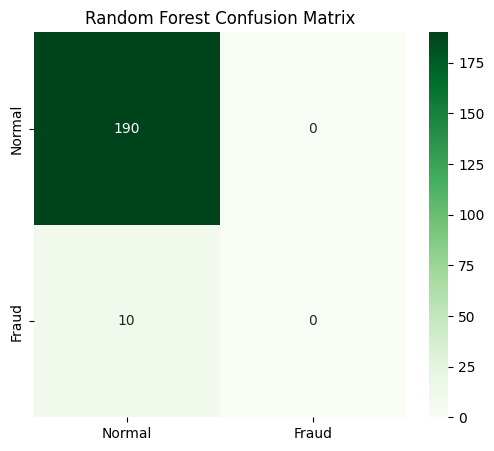

In [240]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle


# Inicjalizacja modelu
model = DecisionTreeClassifier()

# Hiperparametry
param_grid = {
    'max_depth': [None, 10, 25, 50,100,250],  # Maksymalna głębokość drzewa
    'min_samples_split': [2, 10, 50,100,250],  # Minimalana ilość próbek potrzebna do rodzielenia wewnetrznego node
    'min_samples_leaf': [1, 10, 30,75,100],    # Minimalana ilość próbek potrzebna do rodzielenia liścia
    'criterion': ['gini', 'entropy'] # Kryteria do mierzenia jakości split
}

# GridSearchCV do tuningu hyperparametrów
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)

# Najlepsze Parametry
print("Best Hyperparameters:", grid_search.best_params_)

# Trening modelu z najlepszymi parametrami
best_model = grid_search.best_estimator_

# Użycie modelu
Y_pred = best_model.predict(X_test)

# Metryki do oceny modelu
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.show()

## Random forest, Gridsearch szukanie najlepszych parametrów lasu

Rozpoczynam szukanie najlepszych parametrów...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

--- NAJLEPSZY WYNIK ---
Najlepsze parametry: {'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_leaf': 10, 'model__n_estimators': 500}
Najlepsze średnie ROC AUC: 0.5735

--- Random Forest Evaluation ---
Accuracy:  0.8900
Precision: 0.0714
Recall:    0.1000
F1 Score:  0.0833


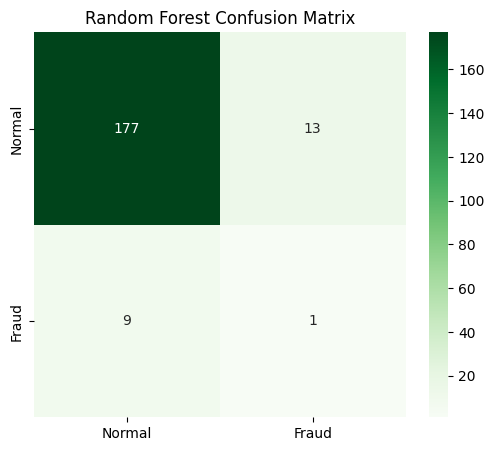

In [241]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Pipeline
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced',))
])

# Hiperparametry dla "model" w pipeline
param_grid = {
    'model__n_estimators': [100, 500, 1000],
    'model__max_depth': [10, 20, None],
    'model__min_samples_leaf': [1, 5, 10],
    'model__criterion': ['gini', 'entropy']
}

# 3. Konfigurujemy GridSearch
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# 4. Uruchamiamy trening
print("Rozpoczynam szukanie najlepszych parametrów...")
grid_search.fit(X_train, Y_train)

# 5. Wyniki
print("\n--- NAJLEPSZY WYNIK ---")
print(f"Najlepsze parametry: {grid_search.best_params_}")
print(f"Najlepsze średnie ROC AUC: {grid_search.best_score_:.4f}")

# Wyciągnięcie najlepszego modelu do dalszej pracy
best_model_from_grid = grid_search.best_estimator_

y_pred = best_model_from_grid.predict(X_test)

# 6. Ewaluacja
print("\n--- Random Forest Evaluation ---")
print(f"Accuracy:  {accuracy_score(Y_test, y_pred):.4f}")
print(f"Precision: {precision_score(Y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(Y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(Y_test, y_pred):.4f}")

# Macierz pomyłek
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits

--- Random Forest Evaluation ---
Accuracy:  0.7050
Precision: 0.0196
Recall:    0.1000
F1 Score:  0.0328


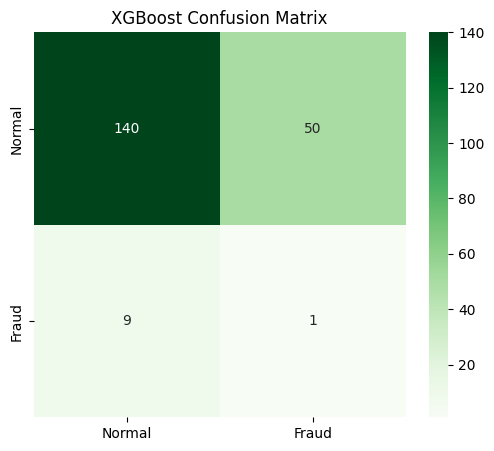

In [242]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 1. Definicja Pipeline
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        random_state=42,
        verbosity=0,
        use_label_encoder=False,
        n_jobs=-1
    ))
])

# 2. Hiperparametry dla XGBoost
# Uwaga: XGBoost używa regularyzacji L1 (reg_alpha) i L2 (reg_lambda)
param_grid = {
    'model__n_estimators': [100, 500],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.1],
    'model__reg_lambda': [1, 10], # Regularyzacja L2 - dobra na skorelowane dane
    'model__reg_alpha': [0, 1]     # Regularyzacja L1
}

# 3. Konfiguracja GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='f1', # Sugerowane F1 dla niezbalansowanych danych
    n_jobs=-1,
    verbose=2
)

# Pamiętaj: fit na surowym X_train, y_train (bez wcześniejszego SMOTE poza pipelinem)
grid_search.fit(X_train, Y_train)

# Wyciągnięcie najlepszego modelu do dalszej pracy
best_model_from_grid = grid_search.best_estimator_

y_pred = best_model_from_grid.predict(X_test)

# 6. Ewaluacja
print("\n--- Random Forest Evaluation ---")
print(f"Accuracy:  {accuracy_score(Y_test, y_pred):.4f}")
print(f"Precision: {precision_score(Y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(Y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(Y_test, y_pred):.4f}")

# Macierz pomyłek
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('XGBoost Confusion Matrix')
plt.show()

# LSTM i RNN

In [271]:
import pandas as pd

if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
else:
    print("BŁĄD: Nie znaleziono kolumny czasu. Podstaw nazwę swojej kolumny z datą/godziną.")

# Sortujemy dane
df = df.sort_values(by=['CustomerID', 'Timestamp'])

df['CustomerAvgAmount'] = df.groupby('CustomerID')['Amount'].transform('mean')

# Dodajemy małą liczbę (1e-6) w mianowniku, żeby nie dzielić przez zero
df['AmountRatio'] = df['Amount'] / (df['CustomerAvgAmount'] + 1e-6)

df = df.drop(columns=['CustomerAvgAmount'])
print("\n--- Przykładowy wynik (Top 5) ---")
print(df[['CustomerID', 'Timestamp', 'Amount', 'AmountRatio']].head(10))


--- Przykładowy wynik (Top 5) ---
     CustomerID           Timestamp    Amount  AmountRatio
786        1001 2022-02-02 18:00:00 -0.866949     1.000001
640        1003 2022-01-27 16:00:00 -0.974314     1.000001
449        1004 2022-01-19 17:00:00 -1.764997     1.644987
920        1004 2022-02-08 08:00:00 -0.380916     0.355015
598        1005 2022-01-25 22:00:00  1.054094     0.999999
76         1007 2022-01-04 04:00:00 -0.566012     1.000002
467        1008 2022-01-20 11:00:00  1.427665     0.999999
293        1009 2022-01-13 05:00:00 -0.807854    -1.938570
913        1009 2022-02-08 01:00:00  1.641305     3.938565
101        1012 2022-01-05 05:00:00  0.249982     0.390133


## Grupowanie

In [272]:
# podział wierszy na 'buckets'
# każdy klient to jeden bucket z transakcjami w kolejności chronologicznej
grouped = df.groupby('CustomerID')

print(grouped.groups)

{1001: [786], 1003: [640], 1004: [449, 920], 1005: [598], 1007: [76], 1008: [467], 1009: [293, 913], 1012: [101, 715], 1014: [944], 1016: [544], 1017: [141, 264, 791], 1018: [442], 1019: [140, 566], 1020: [978], 1022: [196], 1023: [100, 219], 1024: [191, 237, 458, 922], 1025: [503], 1026: [209, 426], 1027: [1], 1029: [524], 1030: [32, 980], 1033: [348, 714], 1036: [584], 1037: [958], 1038: [39], 1043: [54, 614], 1044: [50, 971], 1045: [710], 1048: [356], 1049: [774, 896], 1050: [519], 1051: [576, 835], 1052: [525], 1053: [847], 1054: [86], 1055: [977], 1056: [66, 814], 1057: [757], 1058: [336, 779, 940], 1059: [176, 445], 1060: [310, 924, 990], 1062: [392], 1066: [147], 1067: [338], 1069: [125], 1071: [88], 1072: [709], 1073: [357, 546], 1077: [641], 1078: [320], 1083: [951], 1084: [181, 805], 1085: [872, 946], 1086: [328], 1087: [37, 143], 1088: [933], 1089: [172], 1090: [725], 1091: [771], 1094: [752], 1095: [206], 1096: [588], 1098: [153], 1100: [292], 1102: [572], 1103: [668], 1104

## Skalowanie i podział na features / labels

In [273]:
# df.head()

In [274]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler

# 1. Definiujemy grupy
num_features = [ 'Amount','AccountBalance', 'Age', 'TimeSinceLastLoginDays', 'AmountRatio', 'AnomalyScore', 'Hour', 'Day']
# Zakładam, że Category_X i flagi to 0/1 lub zakodowane wartości, których nie chcemy psuć skalowaniem
cat_features = ['SuspiciousFlag', 'Category_1', 'Category_2', 'Category_3', 'Category_4']

# Łączna lista, żeby zachować kolejność w df (opcjonalnie)
all_features = num_features + cat_features

scaler = StandardScaler()

df = df.copy()

df[num_features] = scaler.fit_transform(df[num_features])

sequences = []
labels = []

grouped = df.groupby('CustomerID')

for _, group in grouped:
    seq = group[all_features].values
    label = group['FraudIndicator'].values

    sequences.append(seq)
    labels.append(label)
features = all_features

## Padding

In [275]:
MAX_LEN = 6
PAD_VAL = -100.0
TEST_SIZE = 0.2
BATCH_SIZE = 32
EPOCHS = 40

from tensorflow.keras.preprocessing.sequence import pad_sequences

X_padded = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', dtype='float32', value=PAD_VAL)
y_padded = pad_sequences(labels, maxlen=MAX_LEN, padding='post', dtype='float32', value=0.0)

import numpy as np
y_padded = y_padded[..., np.newaxis]



## Podział na zbiór treningowy i testowy

In [276]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, y_padded, test_size=TEST_SIZE, random_state=42)

## Wagi

In [277]:
def create_sample_weights_3d(X, y, pad_val, w0, w1):
    """
    Creates 3D weights (N, 6, 1) to match y (N, 6, 1).
    """
    weights = np.zeros_like(y)

    for i in range(len(weights)):
        for j in range(len(weights[i])):
            if X[i, j, 0] == pad_val:
                weights[i, j, 0] = 0.0
            elif y[i, j, 0] == 1:
                weights[i, j, 0] = w1
            else:
                weights[i, j, 0] = w0

    return weights

In [278]:
n_total = len(df)
n_fraud = df['FraudIndicator'].sum()
n_normal = n_total - n_fraud

weight_for_0 = (1 / n_normal) * (n_total / 2.0)
weight_for_1 = (1 / n_fraud) * (n_total / 2.0)

print(f"Weight for Fraud: {weight_for_1:.2f}")
print(f"Weight for Normal: {weight_for_0:.2f}")

train_sample_weights = create_sample_weights_3d(X_train, y_train, PAD_VAL, weight_for_0, weight_for_1)
test_sample_weights = create_sample_weights_3d(X_test, y_test, PAD_VAL, weight_for_0, weight_for_1)

print(f"Weights shape: {train_sample_weights.shape}")

Weight for Fraud: 11.11
Weight for Normal: 0.52
Weights shape: (508, 6, 1)


## Definicja modelu LSTM

In [279]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Masking, TimeDistributed, Dropout, Input, BatchNormalization
from tensorflow.keras.regularizers import l1_l2

# Regresja
reg = l1_l2(l1=0, l2=0.001)

model = Sequential([
    # 1. Wejście
    Input(shape=(MAX_LEN, len(features))),

    # 2. Maska
    Masking(mask_value=PAD_VAL),

    # 3. Pierwszy LSTM
    LSTM(64,
         return_sequences=True,
         activation='tanh',
         recurrent_regularizer=reg,
         kernel_regularizer=reg,
         dropout=0.2,
         ),

     #Dropout(0.2),

    # 4. Drugi LSTM
    LSTM(32,
         return_sequences=True,
         activation='tanh',
         recurrent_regularizer=reg,
         kernel_regularizer=reg,
         dropout=0.2,
         ),

     #Dropout(0.2),

    # 5. Dense
    TimeDistributed(Dense(16, activation='relu')),
    #BatchNormalization(),

    TimeDistributed(Dense(8, activation='relu')),
    #BatchNormalization(),

    TimeDistributed(Dense(4, activation='relu')),
    #BatchNormalization(),

    # 6. Wyjście
    TimeDistributed(Dense(1, activation='sigmoid'))
])

## Budowa i trening modelu

In [280]:
import tensorflow as tf

metrics = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.AUC(name='auc'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.Precision(name='precision')
]

In [281]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=metrics
)

In [282]:
history = model.fit(
    X_train, y_train,
    sample_weight=train_sample_weights,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.0985 - auc: 0.4922 - loss: 1.0120 - precision: 0.0157 - recall: 0.8854 - val_accuracy: 0.0065 - val_auc: 0.5971 - val_loss: 0.8652 - val_precision: 0.0065 - val_recall: 1.0000
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0174 - auc: 0.5260 - loss: 0.9022 - precision: 0.0140 - recall: 1.0000 - val_accuracy: 0.0065 - val_auc: 0.7164 - val_loss: 0.8285 - val_precision: 0.0065 - val_recall: 1.0000
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0138 - auc: 0.5034 - loss: 0.8210 - precision: 0.0125 - recall: 1.0000 - val_accuracy: 0.0065 - val_auc: 0.7368 - val_loss: 0.7989 - val_precision: 0.0065 - val_recall: 1.0000
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.0215 - auc: 0.5383 - loss: 0.8721 - precision: 0.0164 - recall: 1.0000 - val_accuracy: 0.0065 - val_auc: 0.6881 - val_loss: 0.7826 - val_precision: 0.0065 - val_recall: 1.0000
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━

## Analiza Wyników

Test AUC: 0.5573
Test AUC: 0.5826
Test Recall: 0.6000
Test Precision: 0.0088
--- DIAGNOSTYKA DANYCH ---
1. Suma wszystkich wag: 155.55555725097656
2. Generowanie predykcji...
3. Maskowanie: Z 768 punktów zachowano 196 (gdzie waga > 0).
4. Rozkład klas po filtracji: Normalne=191, Fraudy=5
5. Rysowanie wykresów...


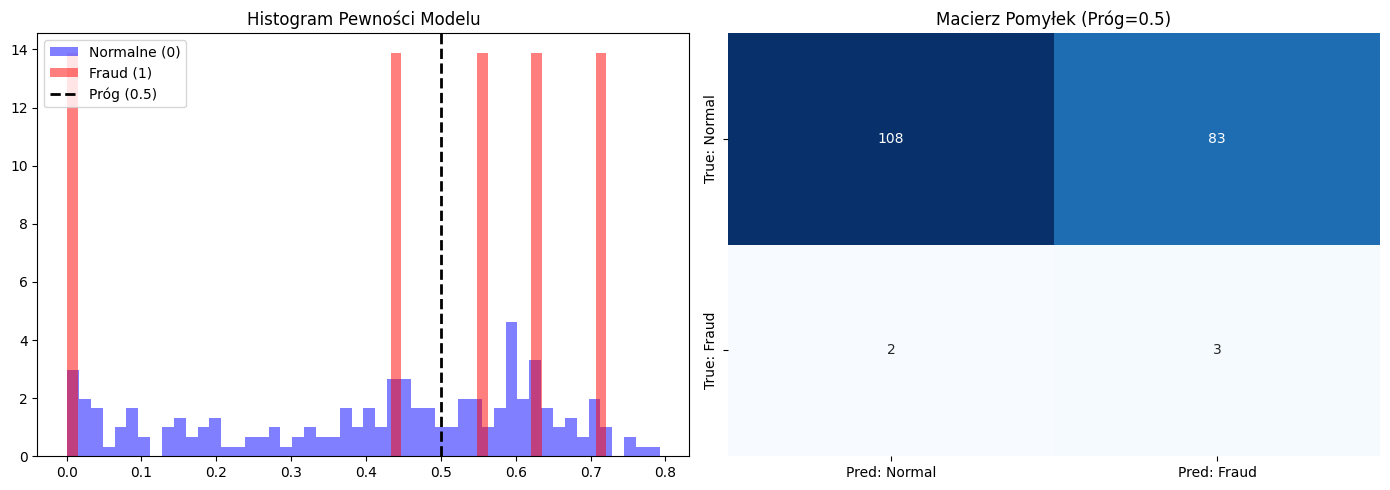

In [283]:
results = model.evaluate(X_test, y_test,
                        #  sample_weight=test_sample_weights,
                         verbose=0)
print(f"Test AUC: {results[1]:.4f}")
print(f"Test AUC: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")
print(f"Test Precision: {results[4]:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

def debug_visual_evaluation(model, X, y, weights, threshold=0.5):
    print("--- DIAGNOSTYKA DANYCH ---")

    # 1. Sprawdzenie czy wagi nie są zerami
    total_weight = np.sum(weights)
    print(f"1. Suma wszystkich wag: {total_weight}")
    if total_weight == 0:
        print("🛑 BŁĄD KRYTYCZNY: Wszystkie wagi to ZERA! Maska usuwa 100% danych.")
        print("   Sprawdź funkcję 'create_sample_weights' i wartość PAD_VAL.")
        return

    # 2. Generowanie predykcji
    print("2. Generowanie predykcji...")
    y_pred_proba = model.predict(X, verbose=0)

    # 3. Naprawa wymiarów (Fix dla modelu zwracającego wynik per klient)
    if y_pred_proba.shape[1] == 1 and y.shape[1] > 1:
        print(f"   ⚠️ Model zwrócił (N, 1). Rozciągam na {y.shape[1]} transakcji.")
        y_pred_proba = np.repeat(y_pred_proba, y.shape[1], axis=1)

    # 4. Spłaszczanie (Flatten)
    y_true_flat = y.flatten()
    y_prob_flat = y_pred_proba.flatten()
    weights_flat = weights.flatten()

    # 5. Maskowanie (Usuwanie paddingu)
    mask = weights_flat > 0

    # Liczenie ile danych zostanie
    n_kept = np.sum(mask)
    n_total = len(mask)
    print(f"3. Maskowanie: Z {n_total} punktów zachowano {n_kept} (gdzie waga > 0).")

    if n_kept == 0:
        print("🛑 BŁĄD: Po nałożeniu maski nie zostało nic do rysowania!")
        return

    y_true_clean = y_true_flat[mask]
    y_prob_clean = y_prob_flat[mask]

    # Sprawdzenie czy mamy obie klasy
    n_zeros = np.sum(y_true_clean == 0)
    n_ones = np.sum(y_true_clean == 1)
    print(f"4. Rozkład klas po filtracji: Normalne={n_zeros}, Fraudy={n_ones}")

    if n_ones == 0:
        print("⚠️ UWAGA: W przefiltrowanym zbiorze NIE MA fraudów (klasa 1).")
        print("   Wykresy mogą wyglądać dziwnie, bo brakuje jednej klasy.")

    # --- RYSOWANIE ---
    print("5. Rysowanie wykresów...")
    plt.figure(figsize=(14, 5))

    # Wykres 1: Histogram
    plt.subplot(1, 2, 1)
    if n_zeros > 0:
        plt.hist(y_prob_clean[y_true_clean == 0], bins=50, alpha=0.5, label='Normalne (0)', color='blue', density=True)
    if n_ones > 0:
        plt.hist(y_prob_clean[y_true_clean == 1], bins=50, alpha=0.5, label='Fraud (1)', color='red', density=True)
    else:
        # Jeśli brak fraudów, rysujemy pusty placeholder żeby wykres nie zniknął
        plt.text(0.5, 0.5, "BRAK FRAUDÓW W DANYCH", ha='center', va='center', transform=plt.gca().transAxes)

    plt.axvline(threshold, color='k', linestyle='dashed', linewidth=2, label=f'Próg ({threshold})')
    plt.title('Histogram Pewności Modelu')
    plt.legend()

    # Wykres 2: Macierz
    y_pred_class = (y_prob_clean > threshold).astype(int)
    # Wymuszamy etykiety [0, 1] nawet jeśli w danych jest tylko jedna klasa
    cm = confusion_matrix(y_true_clean, y_pred_class, labels=[0, 1])

    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Normal', 'Pred: Fraud'],
                yticklabels=['True: Normal', 'True: Fraud'])
    plt.title(f'Macierz Pomyłek (Próg={threshold})')

    plt.tight_layout()
    plt.show()

# Uruchom
debug_visual_evaluation(model, X_test, y_test, test_sample_weights, threshold=0.5)

## Definicja modelu RNN

In [284]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Masking, TimeDistributed, Dropout, Input
from tensorflow.keras.regularizers import l1_l2

# Twoja konfiguracja regularyzacji (L2 only)
reg = l1_l2(l1=0, l2=0.001)

model = Sequential([
    # 1. Wejście
    Input(shape=(MAX_LEN, len(features))),

    # 2. Maska
    Masking(mask_value=PAD_VAL),

    # 3. Pierwszy SimpleRNN
    SimpleRNN(64,
         return_sequences=True,
         activation='tanh',
         recurrent_regularizer=reg,
         kernel_regularizer=reg
         ),

    Dropout(0.2),

    # 4. Drugi SimpleRNN
    SimpleRNN(32,
         return_sequences=True,
         activation='tanh',
         recurrent_regularizer=reg
         ),

    Dropout(0.2),

    # 5. Dense
    TimeDistributed(Dense(16, activation='relu')),

    TimeDistributed(Dense(8, activation='relu')),

    # 6. Wyjście
    TimeDistributed(Dense(1, activation='sigmoid'))
])

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_14 (Masking)            │ (None, 6, 13)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_10 (SimpleRNN)       │ (None, 6, 64)          │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 6, 32)          │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_49             │ (None, 6, 16)          │           528 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_50             │ (None, 6, 8)           │           136 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_51             │ (None, 6, 1)           │             9 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,769 (34.25 KB)

 Trainable params: 8,769 (34.25 KB)

 Non-trainable params: 0 (0.00 B)

## Budowanie i trening Modelu RNN

In [285]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision, AUC
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 1. Definiujemy Optymalizator
opt = Adam(learning_rate=0.001, clipnorm=1.0)

# 2. Kompilacja modelu
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        Recall(name='recall'),       # Ważne: Ile % oszustw wyłapaliśmy?
        Precision(name='precision'), # Ważne: Ile z naszych alarmów to faktycznie oszustwa?
        AUC(name='auc')              # Ogólna jakość modelu niezależnie od progu
    ]
)

In [286]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    sample_weight=train_sample_weights,
    verbose=1
)

Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9434 - auc: 0.4297 - loss: 0.9048 - precision: 0.0121 - recall: 0.0454 - val_accuracy: 0.9622 - val_auc: 0.5668 - val_loss: 0.6711 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9157 - auc: 0.5706 - loss: 0.9560 - precision: 0.0394 - recall: 0.1604 - val_accuracy: 0.9193 - val_auc: 0.6111 - val_loss: 0.7024 - val_precision: 0.0169 - val_recall: 0.2000
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8777 - auc: 0.5245 - loss: 0.8697 - precision: 0.0194 - recall: 0.1571 - val_accuracy: 0.8776 - val_auc: 0.6253 - val_loss: 0.7136 - val_precision: 0.0110 - val_recall: 0.2000
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8374 - auc: 0.5096 - loss: 0.8197 - precision: 0.0131 - recall: 0.1645 - val_accuracy: 0.7917 - val_auc: 0.6362 - val_loss: 0.7242 - val_precision: 0.0064 - val_recall: 0.2000
Epoch 5/40
16/16 ━━━━━━━━━━━

## Ocena wyników

Test AUC: 0.6836
Test AUC: 0.4000
Test Recall: 0.0083
Test Precision: 0.5801
--- DIAGNOSTYKA DANYCH ---
1. Suma wszystkich wag: 155.55555725097656
2. Generowanie predykcji...
3. Maskowanie: Z 768 punktów zachowano 196 (gdzie waga > 0).
4. Rozkład klas po filtracji: Normalne=191, Fraudy=5
5. Rysowanie wykresów...


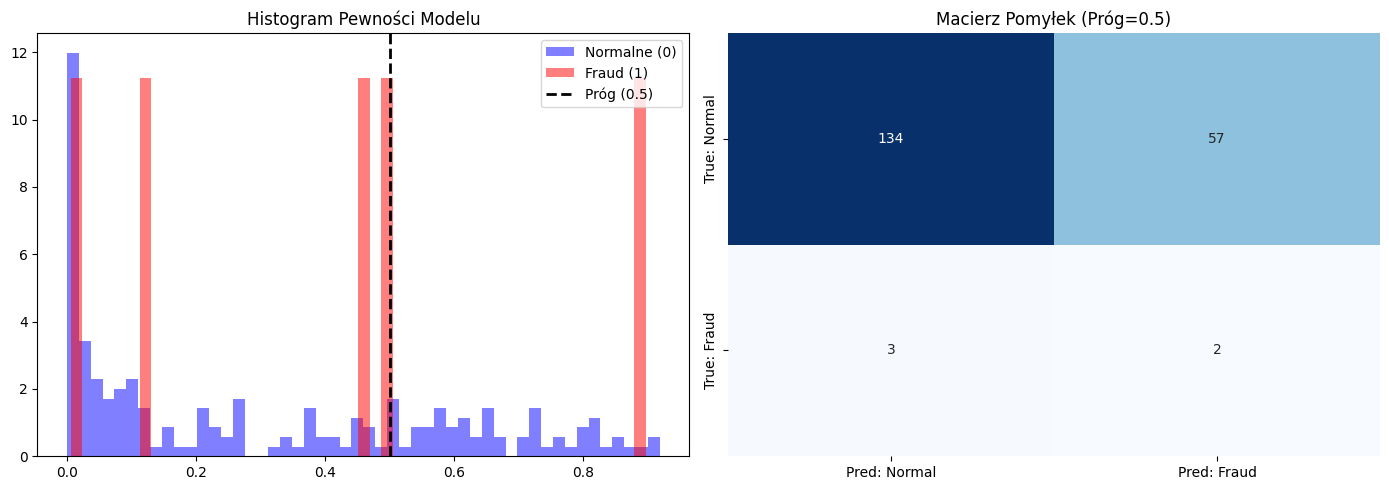

In [287]:
results = model.evaluate(X_test, y_test,
                        #  sample_weight=test_sample_weights,
                         verbose=0)
print(f"Test AUC: {results[1]:.4f}")
print(f"Test AUC: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")
print(f"Test Precision: {results[4]:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

def debug_visual_evaluation(model, X, y, weights, threshold=0.5):
    print("--- DIAGNOSTYKA DANYCH ---")

    # 1. Sprawdzenie czy wagi nie są zerami
    total_weight = np.sum(weights)
    print(f"1. Suma wszystkich wag: {total_weight}")
    if total_weight == 0:
        print("🛑 BŁĄD KRYTYCZNY: Wszystkie wagi to ZERA! Maska usuwa 100% danych.")
        print("   Sprawdź funkcję 'create_sample_weights' i wartość PAD_VAL.")
        return

    # 2. Generowanie predykcji
    print("2. Generowanie predykcji...")
    y_pred_proba = model.predict(X, verbose=0)

    # 3. Naprawa wymiarów (Fix dla modelu zwracającego wynik per klient)
    if y_pred_proba.shape[1] == 1 and y.shape[1] > 1:
        print(f"   ⚠️ Model zwrócił (N, 1). Rozciągam na {y.shape[1]} transakcji.")
        y_pred_proba = np.repeat(y_pred_proba, y.shape[1], axis=1)

    # 4. Spłaszczanie (Flatten)
    y_true_flat = y.flatten()
    y_prob_flat = y_pred_proba.flatten()
    weights_flat = weights.flatten()

    # 5. Maskowanie (Usuwanie paddingu)
    mask = weights_flat > 0

    # Liczenie ile danych zostanie
    n_kept = np.sum(mask)
    n_total = len(mask)
    print(f"3. Maskowanie: Z {n_total} punktów zachowano {n_kept} (gdzie waga > 0).")

    if n_kept == 0:
        print("🛑 BŁĄD: Po nałożeniu maski nie zostało nic do rysowania!")
        return

    y_true_clean = y_true_flat[mask]
    y_prob_clean = y_prob_flat[mask]

    # Sprawdzenie czy mamy obie klasy
    n_zeros = np.sum(y_true_clean == 0)
    n_ones = np.sum(y_true_clean == 1)
    print(f"4. Rozkład klas po filtracji: Normalne={n_zeros}, Fraudy={n_ones}")

    if n_ones == 0:
        print("⚠️ UWAGA: W przefiltrowanym zbiorze NIE MA fraudów (klasa 1).")
        print("   Wykresy mogą wyglądać dziwnie, bo brakuje jednej klasy.")

    # --- RYSOWANIE ---
    print("5. Rysowanie wykresów...")
    plt.figure(figsize=(14, 5))

    # Wykres 1: Histogram
    plt.subplot(1, 2, 1)
    if n_zeros > 0:
        plt.hist(y_prob_clean[y_true_clean == 0], bins=50, alpha=0.5, label='Normalne (0)', color='blue', density=True)
    if n_ones > 0:
        plt.hist(y_prob_clean[y_true_clean == 1], bins=50, alpha=0.5, label='Fraud (1)', color='red', density=True)
    else:
        # Jeśli brak fraudów, rysujemy pusty placeholder żeby wykres nie zniknął
        plt.text(0.5, 0.5, "BRAK FRAUDÓW W DANYCH", ha='center', va='center', transform=plt.gca().transAxes)

    plt.axvline(threshold, color='k', linestyle='dashed', linewidth=2, label=f'Próg ({threshold})')
    plt.title('Histogram Pewności Modelu')
    plt.legend()

    # Wykres 2: Macierz
    y_pred_class = (y_prob_clean > threshold).astype(int)
    # Wymuszamy etykiety [0, 1] nawet jeśli w danych jest tylko jedna klasa
    cm = confusion_matrix(y_true_clean, y_pred_class, labels=[0, 1])

    plt.subplot(1, 2, 2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: Normal', 'Pred: Fraud'],
                yticklabels=['True: Normal', 'True: Fraud'])
    plt.title(f'Macierz Pomyłek (Próg={threshold})')

    plt.tight_layout()
    plt.show()

# Uruchom
debug_visual_evaluation(model, X_test, y_test, test_sample_weights, threshold=0.5)

# Rocket

In [124]:
!pip install sktime
import numpy as np
from sktime.transformations.panel.rocket import Rocket
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 12.1 MB/s eta 0:00:00


In [125]:
X_rocket = []
y_rocket = []

# Grupowanie
for _, group in grouped:
    seq = group[features].tail(6).values
    if len(seq) < 6:
        pad_width = 6 - len(seq)
        seq = np.pad(seq, ((pad_width, 0), (0, 0)), mode='constant')
    X_rocket.append(seq.T)
    y_rocket.append(group['FraudIndicator'].iloc[-1])

X_rocket = np.array(X_rocket)
y_rocket = np.array(y_rocket)

In [126]:
X_rocket.shape

(636, 13, 6)

In [127]:
features

['Amount',
 'AccountBalance',
 'Age',
 'TimeSinceLastLoginDays',
 'AmountRatio',
 'AnomalyScore',
 'Hour',
 'Day',
 'SuspiciousFlag',
 'Category_1',
 'Category_2',
 'Category_3',
 'Category_4']

In [128]:
X_train_rock, X_test_rock, y_train_rock, y_test_rock = train_test_split(
    X_rocket, y_rocket, test_size=0.2, random_state=42, stratify=y_rocket
)

In [129]:
#  Oversampling

from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

n_samples, n_channels, n_length = X_train_rock.shape

# Flatten dla smote
X_train_flat = X_train_rock.reshape(n_samples, n_channels * n_length)

# Smote
print(f"Distribution before SMOTE: {Counter(y_train_rock)}")
smote = SMOTE(random_state=42)
X_resampled_flat, y_resampled_rock = smote.fit_resample(X_train_flat, y_train_rock)

# Spowrotem do 3D
X_resampled_rock = X_resampled_flat.reshape(-1, n_channels, n_length)

# Diagnostyka
print(f"Original X_train_rock shape: {X_train_rock.shape}")
print(f"Resampled X_resampled_rock shape: {X_resampled_rock.shape}")
print(f"New Class Distribution: {Counter(y_resampled_rock)}")

Distribution before SMOTE: Counter({np.int64(0): 486, np.int64(1): 22})
Original X_train_rock shape: (508, 13, 6)
Resampled X_resampled_rock shape: (972, 13, 6)
New Class Distribution: Counter({np.int64(0): 486, np.int64(1): 486})


In [130]:
rocket = Rocket(num_kernels=10000, random_state=42)
X_train_transform = rocket.fit_transform(X_train_rock)
X_test_transform = rocket.transform(X_test_rock)

In [131]:
classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
classifier.fit(X_train_transform, y_train_rock)

RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]))


--- ROCKET Model Evaluation ---
Accuracy:  0.9531
Recall:    0.0000
F1 Score:  0.0000
Confusion Matrix:
[[122   0]
 [  6   0]]


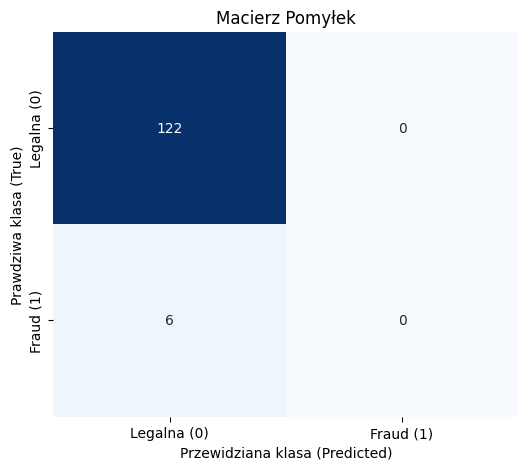

In [132]:
y_pred_rock = classifier.predict(X_test_transform)

print("\n--- ROCKET Model Evaluation ---")
print(f"Accuracy:  {accuracy_score(y_test_rock, y_pred_rock):.4f}")
print(f"Recall:    {recall_score(y_test_rock, y_pred_rock):.4f}")
print(f"F1 Score:  {f1_score(y_test_rock, y_pred_rock):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_rock, y_pred_rock))


# 3. Obliczanie macierzy
cm = confusion_matrix(y_test_rock, y_pred_rock)

# 4. Wizualizacja
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Macierz Pomyłek')
plt.ylabel('Prawdziwa klasa (True)')
plt.xlabel('Przewidziana klasa (Predicted)')
plt.xticks([0.5, 1.5], ['Legalna (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Legalna (0)', 'Fraud (1)'])
plt.show()